In [2]:
import numpy as np
import tensorflow as tf
import pandas as pd
from matplotlib import pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

In [15]:
input = keras.Input(shape=(32,32,3),name='Img')
x = layers.Conv2D(64,3, activation = "relu")(input)
x = layers.Conv2D(64,3,activation = "relu", padding="same")(x)
block_1 = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(64,3,activation = "relu", padding="same")(block_1)
x = layers.Conv2D(64,3,activation = "relu", padding="same")(x)
block_2 = layers.add([x,block_1])

x = layers.Conv2D(64, 3, activation="relu")(block_2)
x = layers.Flatten()(x)
x = layers.Dense(256, activation="relu")(x)
outputs = layers.Dense(10)(x) # The number of output class is 10

In [16]:
model = keras.Model(input, outputs, name="Miniature_resnet")
model.summary()

Model: "Miniature_resnet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Img (InputLayer)                [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_10 (Conv2D)              (None, 30, 30, 64)   1792        Img[0][0]                        
__________________________________________________________________________________________________
conv2d_11 (Conv2D)              (None, 30, 30, 64)   36928       conv2d_10[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_2 (MaxPooling2D)  (None, 15, 15, 64)   0           conv2d_11[0][0]                  
___________________________________________________________________________________

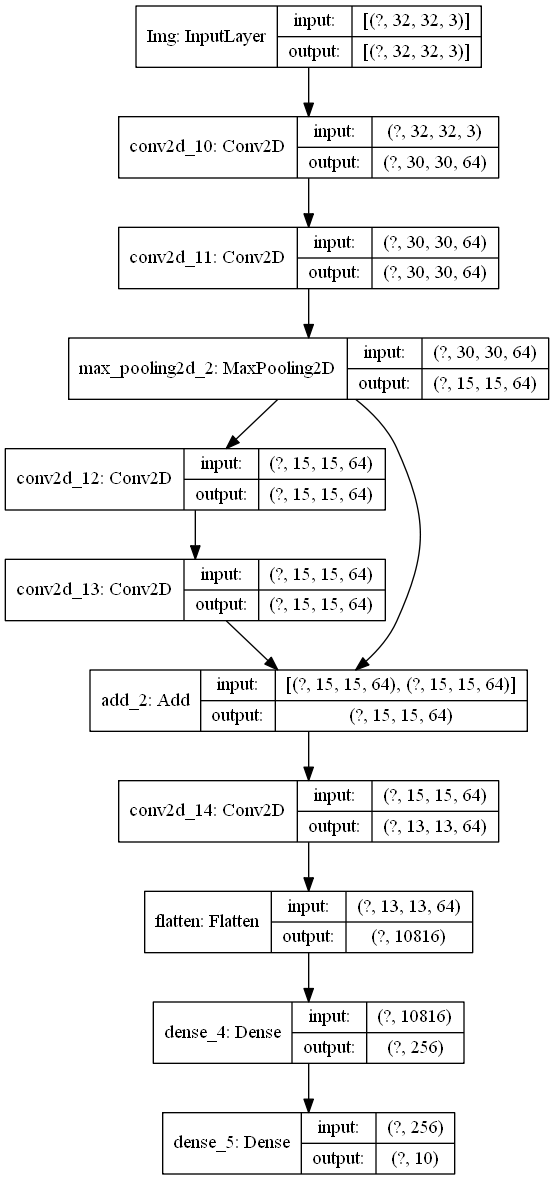

In [17]:
keras.utils.plot_model(model, "mini_resnet.png", show_shapes=True)

In [18]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
label = ['Airplane','Automobile','bird','cat','deer','dog','frog','horse','ship','truck']

x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
y_Val = y_test
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

model.compile(
    optimizer=keras.optimizers.RMSprop(1e-3),
    loss=keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=["acc"],
)
model.fit(x_train, y_train, batch_size=64, epochs=10, validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 14s 350us/sample - loss: 1.5360 - acc: 0.4527 - val_loss: 1.1703 - val_acc: 0.5851
Epoch 2/10
40000/40000 [==============================] - 13s 325us/sample - loss: 0.9844 - acc: 0.6570 - val_loss: 0.8941 - val_acc: 0.6920
Epoch 3/10
40000/40000 [==============================] - 13s 325us/sample - loss: 0.7338 - acc: 0.7462 - val_loss: 0.8271 - val_acc: 0.7216
Epoch 4/10
40000/40000 [==============================] - 13s 323us/sample - loss: 0.5342 - acc: 0.8158 - val_loss: 0.8006 - val_acc: 0.7362
Epoch 5/10
40000/40000 [==============================] - 13s 325us/sample - loss: 0.3574 - acc: 0.8759 - val_loss: 1.0416 - val_acc: 0.7149
Epoch 6/10
40000/40000 [==============================] - 13s 325us/sample - loss: 0.2301 - acc: 0.9224 - val_loss: 1.2605 - val_acc: 0.7258
Epoch 7/10
40000/40000 [==============================] - 13s 324us/sample - loss: 0.1596 - acc: 0.9468 

In [19]:
model_predictions = model.predict(x_test)
pred_dataframe = pd.DataFrame(model_predictions)
pred_dataframe.columns = label
print("Prediction results for the first elements")
pred_dataframe.head()

Prediction results for the first elements


,Airplane,Automobile,bird,cat,deer,dog,frog,horse,ship,truck
0,-32.134350,-24.227558,-19.299450,6.841516,-29.275705,-4.668031,-20.621662,-22.713036,-26.021137,-25.513538
1,-8.661004,4.972150,-50.472176,-41.900433,-54.532349,-47.928024,-36.293568,-49.141361,17.153366,-5.136740
2,-3.867048,-13.798496,-20.159981,-15.080580,-22.219084,-17.431782,-33.273827,-14.200040,-5.357141,-21.893414
3,3.646114,-29.345940,-13.259466,-22.179935,-21.277697,-34.818665,-44.187611,-37.542126,-17.075397,-33.172005
4,-41.925865,-15.384809,-3.171293,-2.449930,2.367973,-8.031275,-9.211741,-37.175835,-33.353439,-25.394842


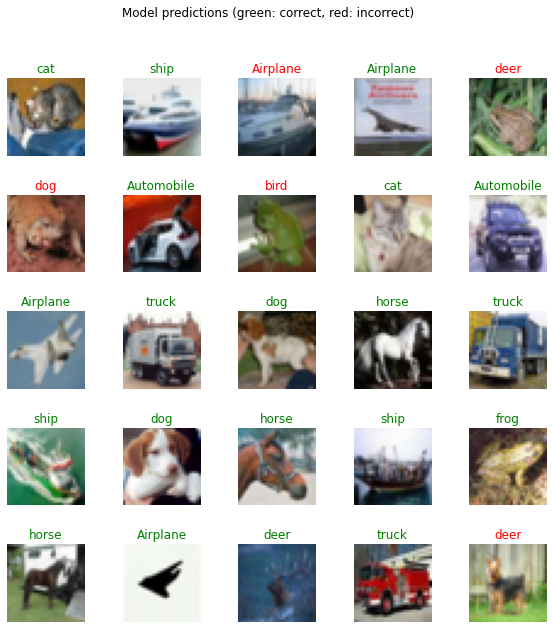

In [52]:
predicted = np.argmax(model_predictions, axis=1)
plt.figure(figsize=(10,10))
plt.subplots_adjust(hspace=0.5)
for n in range(25):
  plt.subplot(5,5,n+1)
  plt.imshow(x_test[n])
  color = "green" if predicted[n] == y_Val[n] else "red"
  idx = int(predicted[n])
  plt.title(label[idx], color=color)
  plt.axis('off')
  _ = plt.suptitle("Model predictions (green: correct, red: incorrect)")

In [66]:
c = 0
for n in range(10000):
    if predicted[n] == y_Val[n]:
        c = c+1
print("Test Accuracy : ",c/100, "%")

Test Accuracy :  72.18 %
